In [45]:
import pandas as pd
import numpy as np
from plotnine import *
import math
import arrow

In [77]:
df = pd.read_csv("/Users/jchi/Downloads/cryptofunds.csv") # from https://docs.google.com/spreadsheets/d/1EAkkKu9GFQ8H9a2bWt_uk9wc4Gv_d3hQtkA23u0v3-4/edit#gid=0

In [78]:
df.head()

,rough date,investor (company),fund name,event type,investee,sector,"amount (or target amount) , $MM",valuation ($MM),country/geo (if applicable),source,comment
0,2021 Jan,"Coinbase, FTX,Avalanche",NaN,invest,Protego Trust Bank,banking/custody,70,?,NaN,https://www.theblock.co/post/148226/protego-tr...,NaN
1,2021 Mar,"Lightspeed, VY Capital",NaN,invest,Blockchain.com,trading,300,"5,200",NaN,https://www.coindesk.com/business/2022/03/31/c...,NaN
2,2021 Aug,"Baillie Gifford,iFinex",NaN,invest,Blockstream,mining,210,"3,200",NaN,https://www.bloomberg.com/news/articles/2021-0...,NaN
3,2021 Nov,"Tiger,Coatue,Blossom,Thrive,Paradigm,NEA",NaN,invest,MoonPay,payments,555,"3,400",NaN,https://www.reuters.com/markets/us/crypto-star...,NaN
4,2021 Nov,"Morgan Creek Digital,10T, ParaFi, Newflow Part...",NaN,invest,Gemini,trading,400,"7,100",NaN,https://www.prnewswire.com/news-releases/crypt...,NaN


In [80]:
def get_quarter(x):
    year = x.format('YYYY')
    qtr = math.ceil(int(x.format('MM'))/3)
    return f"{year} Q{qtr}"

In [81]:
df['amount'] = df['amount (or target amount) , $MM'].apply(lambda x: int(x.replace(',','')) if x.replace(',','').isnumeric() else 0)
df['valuation ($MM)'].fillna('0', inplace=True)
df['valuation'] = df['valuation ($MM)'].apply(lambda x: int(x.replace(',','')) if x.replace(',','').isnumeric() else 0)
df['date'] = df['rough date'].apply(lambda x: arrow.get(x, 'YYYY MMM'))
df['quarter'] = df['date'].apply(lambda x: get_quarter(x))

In [110]:
df.head(10)

,rough date,investor (company),fund name,event type,investee,sector,"amount (or target amount) , $MM",valuation ($MM),country/geo (if applicable),source,comment,amount,valuation,date,quarter
0,2021 Jan,"Coinbase, FTX,Avalanche",NaN,invest,Protego Trust Bank,banking/custody,70,?,NaN,https://www.theblock.co/post/148226/protego-tr...,NaN,70,0,2021-01-01T00:00:00+00:00,2021 Q1
1,2021 Mar,"Lightspeed, VY Capital",NaN,invest,Blockchain.com,trading,300,"5,200",NaN,https://www.coindesk.com/business/2022/03/31/c...,NaN,300,5200,2021-03-01T00:00:00+00:00,2021 Q1
2,2021 Aug,"Baillie Gifford,iFinex",NaN,invest,Blockstream,mining,210,"3,200",NaN,https://www.bloomberg.com/news/articles/2021-0...,NaN,210,3200,2021-08-01T00:00:00+00:00,2021 Q3
3,2021 Nov,"Tiger,Coatue,Blossom,Thrive,Paradigm,NEA",NaN,invest,MoonPay,payments,555,"3,400",NaN,https://www.reuters.com/markets/us/crypto-star...,NaN,555,3400,2021-11-01T00:00:00+00:00,2021 Q4
4,2021 Nov,"Morgan Creek Digital,10T, ParaFi, Newflow Part...",NaN,invest,Gemini,trading,400,"7,100",NaN,https://www.prnewswire.com/news-releases/crypt...,NaN,400,7100,2021-11-01T00:00:00+00:00,2021 Q4
5,2021 Nov,NaN,NaN,raise from LPs,Paradigm,general crypto,"2,500",0,NaN,https://decrypt.co/86126/paradigm-2-5-billion-...,NaN,2500,0,2021-11-01T00:00:00+00:00,2021 Q4
6,2021 Dec,"WesCap, Bessemer, Affirm, FIS, Fiserve",NaN,invest,Nydig,trading,"1,000","7,000",NaN,https://www.finextra.com/newsarticle/39401/nyd...,NaN,1000,7000,2021-12-01T00:00:00+00:00,2021 Q4
7,2022 Jan,"Three Arrows Capital,Mechanism Capital, Dragon...",NaN,invest,NEAR,smart contract,150,0,NaN,https://blockworks.co/near-token-spikes-after-...,NaN,150,0,2022-01-01T00:00:00+00:00,2022 Q1
8,2022 Jan,"Paradigm, Temasek, Multicoin, SoftBank",NaN,invest,FTX,trading,400,"32,000",NaN,https://www.coindesk.com/business/2022/01/31/f...,NaN,400,32000,2022-01-01T00:00:00+00:00,2022 Q1
9,2022 Jan,"Sun Hung Kai,Meta Investments,",NaN,invest,Sygnum,banking/custody,120,"1,000",SG,https://www.straitstimes.com/business/banking/...,NaN,120,1000,2022-01-01T00:00:00+00:00,2022 Q1


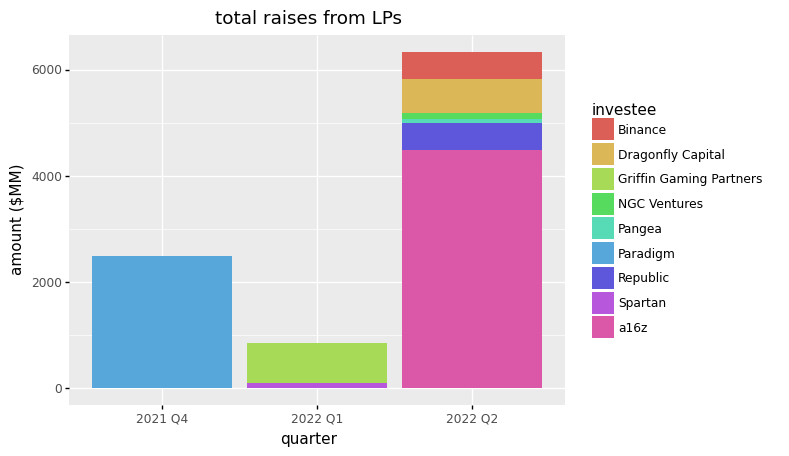

<ggplot: (328198298)>

In [113]:
(ggplot(df.query("`event type`=='raise from LPs'"), aes(x='quarter',y='amount',fill='investee')) + geom_col() + ggtitle("total raises from LPs")) + ylab("amount ($MM)")

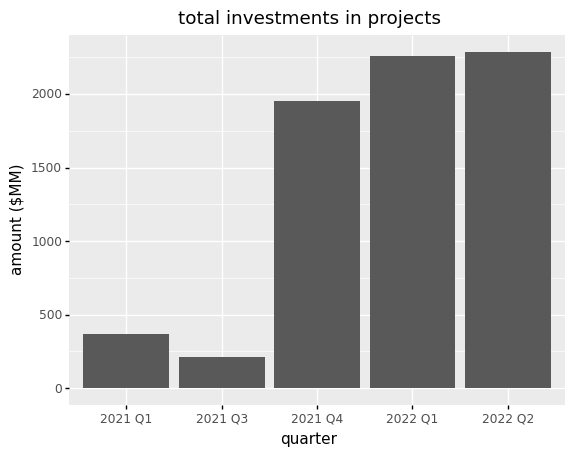

<ggplot: (327797899)>

In [105]:
(ggplot(df.query("`event type`=='invest'"), aes(x='quarter',y='amount')) + geom_col() + ggtitle("total investments in projects")) + ylab("amount ($MM)")

In [96]:
sectors = set()
for sec in df['sector']:
    for x in sec.split(','):
        sectors.add(x)
        
sec_metrics = []
for _, row in df.iterrows():
    for sec in sectors:
        if sec in row['sector']:
            sec_metrics.append((sec, row['quarter'], row['event type'], row['amount'], row['valuation']))
df_sec = pd.DataFrame(sec_metrics,columns=('sector',  'quarter', 'event type','amount', 'valuation'))

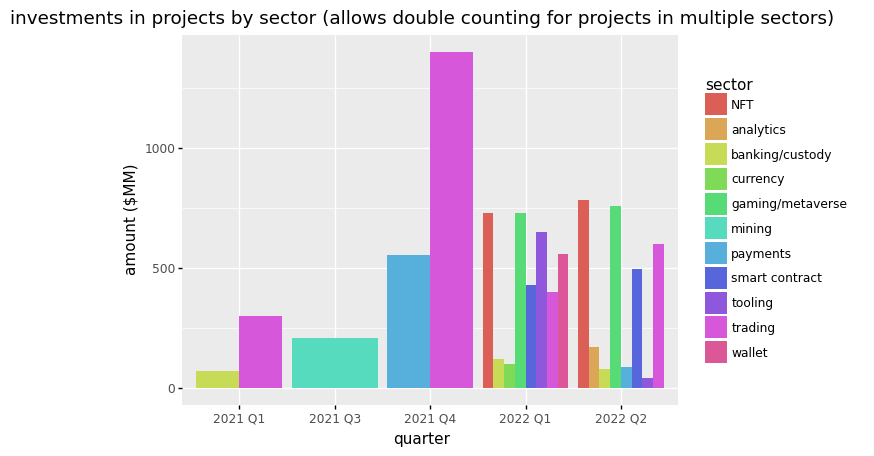

<ggplot: (328068268)>

In [104]:
dfagg = df_sec.query("`event type`=='invest'").groupby(['quarter','sector']).sum().reset_index()
(ggplot(dfagg, aes(x='quarter',y='amount',fill='sector')) + geom_col(position='dodge') + ggtitle("investments in projects by sector (allows double counting for projects in multiple sectors)")) + ylab("amount ($MM)")

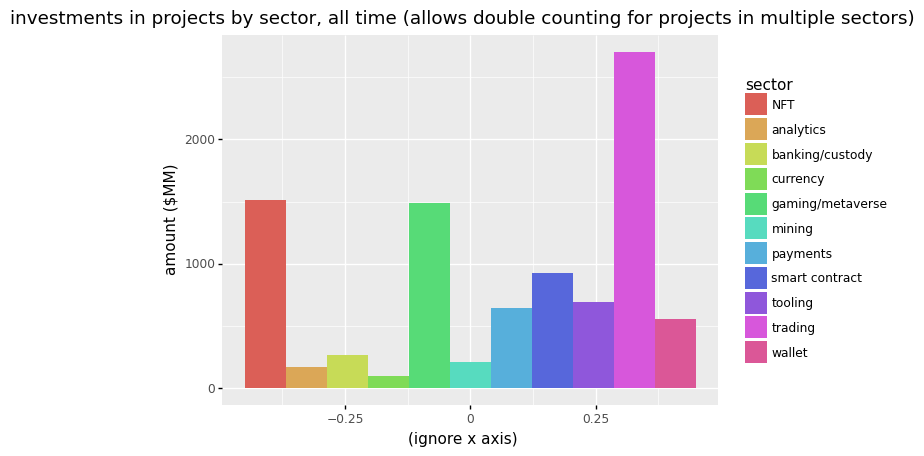

<ggplot: (327714708)>

In [108]:
dfagg = df_sec.query("`event type`=='invest'").groupby(['sector']).sum().reset_index()
(ggplot(dfagg, aes(x=0, y='amount',fill='sector')) + geom_col(position='dodge') + ggtitle("investments in projects by sector, all time (allows double counting for projects in multiple sectors)")) + ylab("amount ($MM)") + xlab("(ignore x axis)")

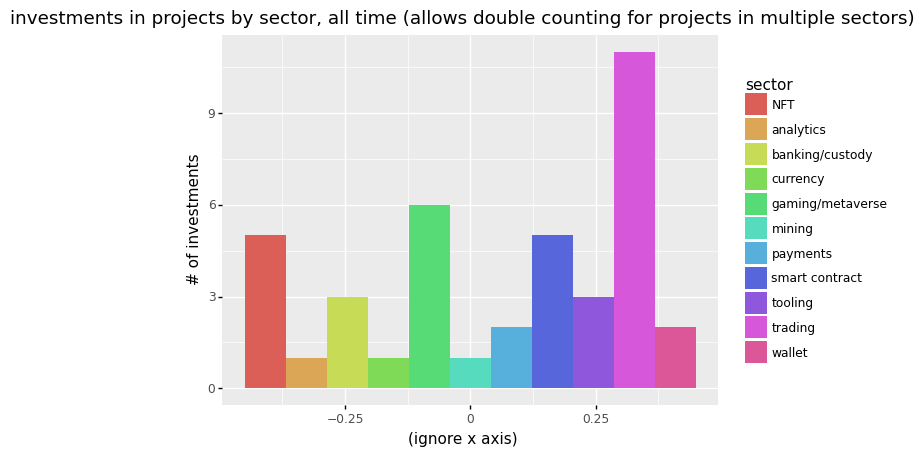

<ggplot: (327681118)>

In [109]:
dfagg = df_sec.query("`event type`=='invest'").groupby(['sector']).count().reset_index()
(ggplot(dfagg, aes(x=0, y='amount',fill='sector')) + geom_col(position='dodge') + ggtitle("investments in projects by sector, all time (allows double counting for projects in multiple sectors)")) + ylab("# of investments") + xlab("(ignore x axis)")